In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model

In [9]:
# Load dataset
data = datasets.load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


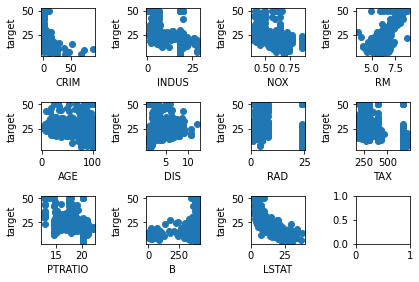

In [12]:
# Show relation between different attributes
fig, axs = plt.subplots(3, 4)
axs[0, 0].scatter(df["CRIM"],df["target"])
axs[0, 0].set_xlabel("CRIM")
axs[0, 0].set_ylabel("target")
axs[0, 1].scatter(df["INDUS"],df["target"])
axs[0, 1].set_xlabel("INDUS")
axs[0, 1].set_ylabel("target")
axs[0, 2].scatter(df["NOX"],df["target"])
axs[0, 2].set_xlabel("NOX")
axs[0, 2].set_ylabel("target")
axs[0, 3].scatter(df["RM"],df["target"])
axs[0, 3].set_xlabel("RM")
axs[0, 3].set_ylabel("target")
axs[1, 0].scatter(df["AGE"],df["target"])
axs[1, 0].set_xlabel("AGE")
axs[1, 0].set_ylabel("target")
axs[1, 1].scatter(df["DIS"],df["target"])
axs[1, 1].set_xlabel("DIS")
axs[1, 1].set_ylabel("target")
axs[1, 2].scatter(df["RAD"],df["target"])
axs[1, 2].set_xlabel("RAD")
axs[1, 2].set_ylabel("target")
axs[1, 3].scatter(df["TAX"],df["target"])
axs[1, 3].set_xlabel("TAX")
axs[1, 3].set_ylabel("target")
axs[2, 0].scatter(df["PTRATIO"],df["target"])
axs[2, 0].set_xlabel("PTRATIO")
axs[2, 0].set_ylabel("target")
axs[2, 1].scatter(df["B"],df["target"])
axs[2, 1].set_xlabel("B")
axs[2, 1].set_ylabel("target")
axs[2, 2].scatter(df["LSTAT"],df["target"])
axs[2, 2].set_xlabel("LSTAT")
axs[2, 2].set_ylabel("target")
fig.tight_layout()
plt.show()

In [15]:
# Use only LSTAT feature
boston_X = np.array(df["LSTAT"]).reshape(-1,1)
boston_y = target
print(boston_X)
print(boston_y)

[[ 4.98]
 [ 9.14]
 [ 4.03]
 [ 2.94]
 [ 5.33]
 [ 5.21]
 [12.43]
 [19.15]
 [29.93]
 [17.1 ]
 [20.45]
 [13.27]
 [15.71]
 [ 8.26]
 [10.26]
 [ 8.47]
 [ 6.58]
 [14.67]
 [11.69]
 [11.28]
 [21.02]
 [13.83]
 [18.72]
 [19.88]
 [16.3 ]
 [16.51]
 [14.81]
 [17.28]
 [12.8 ]
 [11.98]
 [22.6 ]
 [13.04]
 [27.71]
 [18.35]
 [20.34]
 [ 9.68]
 [11.41]
 [ 8.77]
 [10.13]
 [ 4.32]
 [ 1.98]
 [ 4.84]
 [ 5.81]
 [ 7.44]
 [ 9.55]
 [10.21]
 [14.15]
 [18.8 ]
 [30.81]
 [16.2 ]
 [13.45]
 [ 9.43]
 [ 5.28]
 [ 8.43]
 [14.8 ]
 [ 4.81]
 [ 5.77]
 [ 3.95]
 [ 6.86]
 [ 9.22]
 [13.15]
 [14.44]
 [ 6.73]
 [ 9.5 ]
 [ 8.05]
 [ 4.67]
 [10.24]
 [ 8.1 ]
 [13.09]
 [ 8.79]
 [ 6.72]
 [ 9.88]
 [ 5.52]
 [ 7.54]
 [ 6.78]
 [ 8.94]
 [11.97]
 [10.27]
 [12.34]
 [ 9.1 ]
 [ 5.29]
 [ 7.22]
 [ 6.72]
 [ 7.51]
 [ 9.62]
 [ 6.53]
 [12.86]
 [ 8.44]
 [ 5.5 ]
 [ 5.7 ]
 [ 8.81]
 [ 8.2 ]
 [ 8.16]
 [ 6.21]
 [10.59]
 [ 6.65]
 [11.34]
 [ 4.21]
 [ 3.57]
 [ 6.19]
 [ 9.42]
 [ 7.67]
 [10.63]
 [13.44]
 [12.33]
 [16.47]
 [18.66]
 [14.09]
 [12.27]
 [15.55]
 [13.  ]
 

In [25]:
# Split the data into training/testing sets
boston_X_train = boston_X[:-40]
boston_X_test = boston_X[-40:]

# Split the targets into training/testing sets
boston_y_train = boston_y[:-40]
boston_y_test = boston_y[-40:]


# Model can also be prepared by not creating separate training/testing sets

In [26]:
# Create and fit model
model = linear_model.LinearRegression(n_jobs=-1)
model.fit(boston_X_train,boston_y_train)
# Make predictions using the testing set
boston_y_pred = model.predict(boston_X_test)
r_sq = model.score(boston_X_test,boston_y_test)
# Show results
print('Coefficients : %.3f'
      % model.coef_)
# The mean squared error
print('Intercept : %.2f'
      % model.intercept_)
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination : %.3f'
      % r_sq)

Coefficients : -0.961
Intercept : 34.81
Coefficient of determination : 0.212


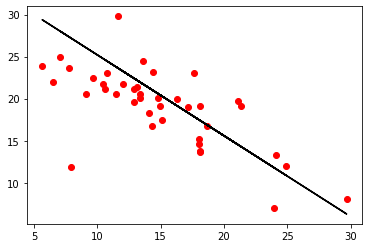

In [28]:
# Plot results
plt.scatter(boston_X_test, boston_y_test,  color='red')
plt.plot(boston_X_test, boston_y_pred, color='black')
plt.show()